# Assignment 1 on ML Prediction Using Tips Dataset - Linear Regression

In [27]:
# !pip install scikit-learn

# import the necessary library
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)
import joblib
print("All libraries are successfully loaded!")

All libraries are successfully loaded!


### Loading in-built tips dataset from seaborn

In [28]:
tips = sns.load_dataset("tips")

# To display dataset (5 first records)
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [29]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [58]:
tips.loc[tips["total_bill"] <= 8]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.00,Female,Yes,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
149,7.51,2.00,Male,No,Thur,Lunch,2
172,7.25,5.15,Male,Yes,Sun,Dinner,2
195,7.56,1.44,Male,No,Thur,Lunch,2
218,7.74,1.44,Male,Yes,Sat,Dinner,2


In [31]:
tips.loc[tips["total_bill"] >= 40]

,total_bill,tip,sex,smoker,day,time,size
59,48.27,6.73,Male,No,Sat,Dinner,4
95,40.17,4.73,Male,Yes,Fri,Dinner,4
102,44.30,2.50,Female,Yes,Sat,Dinner,3
142,41.19,5.00,Male,No,Thur,Lunch,5
156,48.17,5.00,Male,No,Sun,Dinner,6
170,50.81,10.00,Male,Yes,Sat,Dinner,3
182,45.35,3.50,Male,Yes,Sun,Dinner,3
184,40.55,3.00,Male,Yes,Sun,Dinner,2
197,43.11,5.00,Female,Yes,Thur,Lunch,4
212,48.33,9.00,Male,No,Sat,Dinner,4


## Quick Summary of Key Columns in tips dataset:

**total_bill**: *Total bill (cost of the meal) before tip.*

**tip**: *The gratuity (extra amount) given to the server.*

**sex**: *Gender of the person paying.*

**smoker**: *Whether the party included smokers.*

**day**: *Day of the week (Thur, Fri, Sat, Sun).*

**time**: *Time of day (Lunch or Dinner).*

**size**: *Number of people in the dining party.* (source: ChatGPT)

### From the above information, it can be deduced that "tip" depends on "total_bill". Therefore, dependent variable is "tip" -> Y = tip and X = total_bill.

# Understanding the Data

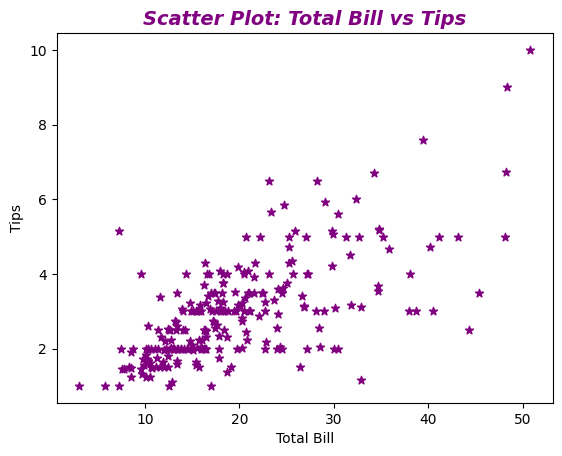

In [32]:
plt.scatter(tips['total_bill'], tips['tip'], color = "purple", marker = "*")
plt.xlabel('Total Bill')
plt.ylabel('Tips')
plt.title("Scatter Plot: Total Bill vs Tips", color= 'purple', fontsize = 14, fontweight = "bold", fontstyle= "italic")
plt.show()          

#### Above plot shows direct (positive) relationship between total_bill and tip

# Preparing Data fo Machine Learning

In [33]:
# Remame data as x and y
x = tips[["total_bill"]]
y = tips[["tip"]]

# Split your data into trianing and testing
x_train, x_test, y_train, y_test =train_test_split(x, y, test_size = 0.2, random_state = 42)

# Buiding the Model

In [34]:
# creat and train the model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [35]:
y_pred =model.predict(x_test)

In [36]:
# Display the first few predictions
print("First few predictions:", np.round(y_pred[:10], 2))

First few predictions: [[3.05]
 [1.86]
 [3.55]
 [3.69]
 [2.32]
 [2.84]
 [3.97]
 [2.26]
 [2.51]
 [2.57]]


# Understanding the Model

In [37]:
print(f"Slope (m): {model.coef_[0][0]:.2f}")
print(f"Intercept (b): {model.intercept_[0]:.2f}")

Slope (m): 0.11
Intercept (b): 0.93


### The Model Equation = Price(y) = (Slope * Size) + Intercept, Y = mx + b

#    Y = 0.11x + 0.93

# Evaluation of the Model
Evaluation of model by calculating Mean Square Error(mse), Root of Square Error(rmse) and R-Square Score(r2).

In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the result of parameters in 2 decimal places
print(f"Mean Square Error is {mse:.2f}")
print(f"Root Mean Square Error is {rmse:.2f}")
print(f"R-Square Score is {r2:.2f}")

Mean Square Error is 0.57
Root Mean Square Error is 0.75
R-Square Score is 0.54


# Interpretations
### The lower the percentage of errors the better for both mse and rmse. The model gives 57% and 75% for mse and rmse respectively.
### The R-Square Score implies that 54% of tip is determined by total_bill whereas the remaining 34% is determined by other variables not captured in the model.

# Visualize the Predicted tip vs Actual tip

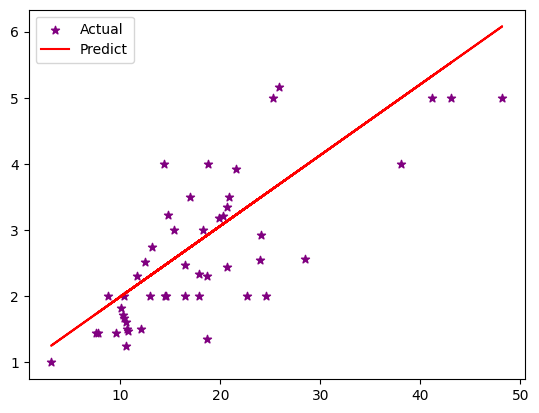

In [39]:
plt.scatter(x_test, y_test, color = 'purple', label = 'Actual', marker= "*")
plt.plot(x_test, y_pred, color='red', label= 'Predict')
plt.legend()
plt.show()

# Save Model

In [42]:
joblib.dump(model, "tips_predictor.joblib")

['tips_predictor.joblib']

# Using Saved Model for Prediction of New Values

In [45]:
loaded_model = joblib.load("tips_predictor.joblib")

In [63]:
# Lower total_bill of 5.16 is given to test the accuracy prediction of the model

low_total_bill = pd.DataFrame([[7.10]], columns=['total_bill']) 
predicted_tip = loaded_model.predict(low_total_bill)
predicted_tip = round(predicted_tip.item(), 2)
print(f" The predicted tip for total bill of $7.10 is ${predicted_tip}")

 The predicted tip for total bill of $7.10 is $1.68


In [49]:
# Higher total_bill of 70.05 is given to test the accuracy prediction of the model

high_total_bill = pd.DataFrame([[70.05]], columns=['total_bill'])
predicted_tip = loaded_model.predict(high_total_bill)
predicted_tip = round(predicted_tip.item(), 2)
print(f" The predicted tip for total bill of $70.05 is ${predicted_tip}")

 The predicted tip for total bill of $70.05 is $8.42


### The precisions of total_bill 1.68 dollar and 8.42 dollar are within the range.
### For more accurate precisions more data may be needed to train the model and other variables that can influence buyer attitude to give tip such as sex,	smoker,	size etc. can be incorporated in the model.